In [30]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

In [32]:
spark = SparkSession.builder.appName("Customers").getOrCreate()

In [33]:
path = "Final Dataset (1).csv"

df = spark.read.option("header",'True').option('delimiter', ',').csv(path)
df.printSchema()

root
 |-- group: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- outcome: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gendera: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- hypertensive: string (nullable = true)
 |-- atrialfibrillation: string (nullable = true)
 |-- CHD with no MI: string (nullable = true)
 |-- diabetes: string (nullable = true)
 |-- deficiencyanemias: string (nullable = true)
 |-- depression: string (nullable = true)
 |-- Hyperlipemia: string (nullable = true)
 |-- Renal failure: string (nullable = true)
 |-- COPD: string (nullable = true)
 |-- heart rate: string (nullable = true)
 |-- Systolic blood pressure: string (nullable = true)
 |-- Diastolic blood pressure: string (nullable = true)
 |-- Respiratory rate: string (nullable = true)
 |-- temperature: string (nullable = true)
 |-- SP O2: string (nullable = true)
 |-- Urine output: string (nullable = true)
 |-- hematocrit: string (nullable = true)
 |-- RBC: str

In [34]:
df.show(5)

+-----+------+-------+---+-------+-----------+------------+------------------+--------------+--------+-----------------+----------+------------+-------------+----+-----------+-----------------------+------------------------+----------------+-----------+-----------+------------+-----------+-----------+-----------+-----------+------+-----------+-----------+---------+-----------+---------+----------+-----------+-----------+---------+---------------+-----------+-------------+-----------+---------------+------------+-------------+-----------+-----------+-------------+-----+-----------+-----------+----+---+
|group|    ID|outcome|age|gendera|        BMI|hypertensive|atrialfibrillation|CHD with no MI|diabetes|deficiencyanemias|depression|Hyperlipemia|Renal failure|COPD| heart rate|Systolic blood pressure|Diastolic blood pressure|Respiratory rate|temperature|      SP O2|Urine output| hematocrit|        RBC|        MCH|       MCHC|   MCV|        RDW|  Leucocyte|Platelets|Neutrophils|Basophils|Ly

In [35]:
##subsetting data frame
df1 = df.select(df['Renal failure'],df['Systolic blood pressure'],df['Blood potassium'],df['heart rate'],df['hematocrit'],df['Urine output'],df['Urea nitrogen'],df['Creatinine'],df['hypertensive'],df['diabetes'],df['deficiencyanemias'],df['Lactic acid'],df['EF'])
                                            

In [36]:
from pyspark.sql.types import IntegerType, FloatType, StringType
df = df.withColumn("Renal failure", df["Renal failure"].cast(IntegerType()))\
.withColumn("Systolic blood pressure", df["Systolic blood pressure"].cast(FloatType()))\
.withColumn("Blood potassium", df["Blood potassium"].cast(FloatType()))\
.withColumn("heart rate", df["heart rate"].cast(FloatType()))\
.withColumn("hematocrit", df["hematocrit"].cast(FloatType()))\
.withColumn("Urine output", df["Urine output"].cast(IntegerType()))\
.withColumn("Urea nitrogen", df["Urea nitrogen"].cast(FloatType()))\
.withColumn("Creatinine", df["Creatinine"].cast(FloatType()))\
.withColumn("hypertensive", df["hypertensive"].cast(IntegerType()))\
.withColumn("diabetes", df["diabetes"].cast(IntegerType()))\
.withColumn("deficiencyanemias", df["deficiencyanemias"].cast(IntegerType()))\
.withColumn("Lactic acid", df["Lactic acid"].cast(FloatType()))\
.withColumn("EF", df["EF"].cast(IntegerType()))

In [37]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['Systolic blood pressure','Blood potassium','heart rate','hematocrit','Urine output','Urea nitrogen','Creatinine','hypertensive','diabetes','deficiencyanemias','Lactic acid','EF'], 
    outputCols=["{}".format(c) for c in ['Systolic blood pressure','Blood potassium','heart rate','hematocrit','Urine output','Urea nitrogen','Creatinine','hypertensive','diabetes','deficiencyanemias','Lactic acid','EF']]
)
df= imputer.fit(df).transform(df)


In [38]:
featureassembler = VectorAssembler(inputCols = ['Systolic blood pressure','Blood potassium','heart rate','hematocrit','Urine output','Urea nitrogen','Creatinine','hypertensive','diabetes','deficiencyanemias','Lactic acid','EF'], outputCol = "features")

In [39]:
output = featureassembler.transform(df)
output.select("features").show()

+--------------------+
|            features|
+--------------------+
|[155.866668701171...|
|[140.0,4.44999980...|
|[135.333328247070...|
|[126.400001525878...|
|[156.559997558593...|
|[118.099998474121...|
|[106.565216064453...|
|[141.130432128906...|
|[98.4347839355468...|
|[122.0,3.86999988...|
|[149.035720825195...|
|[103.260871887207...|
|[126.903228759765...|
|[112.142860412597...|
|[107.360000610351...|
|[159.695648193359...|
|[157.289474487304...|
|[113.279998779296...|
|[162.240005493164...|
|[112.416664123535...|
+--------------------+
only showing top 20 rows



In [40]:
finalised_data = output.select("features", "Renal failure")

In [72]:
finalised_data = output.select('features', 'Renal failure')
finalised_data.show()

+--------------------+-------------+
|            features|Renal failure|
+--------------------+-------------+
|[155.866668701171...|            1|
|[140.0,4.44999980...|            0|
|[135.333328247070...|            1|
|[126.400001525878...|            0|
|[156.559997558593...|            1|
|[118.099998474121...|            1|
|[106.565216064453...|            1|
|[141.130432128906...|            0|
|[98.4347839355468...|            1|
|[122.0,3.86999988...|            0|
|[149.035720825195...|            0|
|[103.260871887207...|            0|
|[126.903228759765...|            0|
|[112.142860412597...|            1|
|[107.360000610351...|            0|
|[159.695648193359...|            1|
|[157.289474487304...|            1|
|[113.279998779296...|            1|
|[162.240005493164...|            0|
|[112.416664123535...|            1|
+--------------------+-------------+
only showing top 20 rows



In [102]:
finalised_data = finalised_data.withColumnRenamed("Renal failure","label")
train, test = finalised_data.randomSplit([0.7, 0.3])

In [103]:
test.show(2)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[79.2307662963867...|    1|
|[85.28125,4.01999...|    0|
+--------------------+-----+
only showing top 2 rows



In [104]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, TrainValidationSplit
logit = LogisticRegression(maxIter=10)
pipeline = Pipeline(stages=[logit])
paramGrid = ParamGridBuilder() \
    .addGrid(logit.regParam, [0, 0.01, 0.05, 0.1, 0.5, 1]) \
    .addGrid(logit.elasticNetParam, [0.0, 0.1, 0.5, 0.8, 1]) \
    .build()
evaluator = BinaryClassificationEvaluator(metricName = 'areaUnderPR')
val = TrainValidationSplit(
            estimator=pipeline,
            estimatorParamMaps=paramGrid,
            evaluator=evaluator,
            # 80% of the data will be used for training, 20% for validation.
            trainRatio=0.8)
# crossval = CrossValidator(estimator=pipeline,
#                           estimatorParamMaps=paramGrid,
#                           evaluator=evaluator,
#                           numFolds=5)

tuned_model = val.fit(train)
bestModel  = tuned_model.bestModel

In [88]:
def evaluate(model, df_train, df_test):
    train_pred = model.transform(df_train)
    train_acc = evaluator.evaluate(train_pred)
    
    test_pred = model.transform(df_test)
    test_acc = evaluator.evaluate(test_pred)
    
    print('train_acc: {}, test_acc: {}'.format(train_acc, test_acc))
    
    return train_pred, test_pred

In [107]:
train_pred, test_pred = evaluate(tuned_model, train, test)

train_acc: 0.7865729325487624, test_acc: 0.7593307274862472


In [106]:


finalPredictionstrain = tuned_model.transform(test)
evaluator.evaluate(finalPredictionstrain)

0.7593307274862472

In [108]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

class Util:
        
    def report_classification(model, df_train, df_test, X_features, y_feature):
        
        classes_train = np.unique(df_train[y_feature].values).tolist()
        classes_test = np.unique(df_test[y_feature].values).tolist()
        
        assert (classes_train == classes_test)
        
        classes = classes_train # The order of class is important!
        
        X_train = df_train[X_features].values.tolist()
        X_test = df_test[X_features].values.tolist()
        
        y_train = df_train[y_feature].values.tolist()
        y_test = df_test[y_feature].values.tolist()
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        report_cm(y_train, y_test, y_train_pred, y_test_pred, classes)
        
    def report_cm(y_train, y_test, y_train_pred, y_test_pred, classes):
        figure, axes = plt.subplots(1, 2, figsize=(10,5))

        cm_test = confusion_matrix(y_test, y_test_pred)
        df_cm_test = pd.DataFrame(cm_test, index = classes, columns = classes)
        ax = sns.heatmap(df_cm_test, annot=True, ax = axes[0], square= True)
        ax.set_title('Test CM')

        cm_train = confusion_matrix(y_train, y_train_pred)
        df_cm_train = pd.DataFrame(cm_train, index = classes, columns = classes)
        ax = sns.heatmap(df_cm_train, annot=True, ax = axes[1], square= True)
        ax.set_title('Train CM')

        print('-' * 20 + 'Testing Performance' + '-' * 20)
        print(classification_report(y_test, y_test_pred, target_names = classes))
        print('acc: ', metrics.accuracy_score(y_test, y_test_pred))

        print('-' * 20 + 'Training Performance' + '-' * 20)
        print(classification_report(y_train, y_train_pred, target_names = classes))
        print('acc: ', metrics.accuracy_score(y_train, y_train_pred))


--------------------Testing Performance--------------------
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       214
           1       0.79      0.58      0.66       146

    accuracy                           0.76       360
   macro avg       0.77      0.73      0.74       360
weighted avg       0.77      0.76      0.76       360

acc:  0.7638888888888888
--------------------Training Performance--------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       533
           1       0.79      0.63      0.70       284

    accuracy                           0.81       817
   macro avg       0.80      0.77      0.78       817
weighted avg       0.81      0.81      0.81       817

acc:  0.8115055079559363


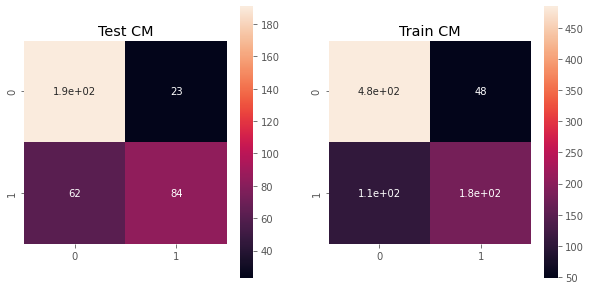

In [109]:
y_train = train_pred.select('label').toPandas().apply(lambda x : x[0], 1).values.tolist()
y_train_pred = train_pred.select('prediction').toPandas().apply(lambda x : x[0], 1).values.tolist()

y_test = test_pred.select('label').toPandas().apply(lambda x : x[0], 1).values.tolist()
y_train_test = test_pred.select('prediction').toPandas().apply(lambda x : x[0], 1).values.tolist()

Util.report_cm(y_train, y_test, y_train_pred, y_train_test, ['0', '1'])

In [110]:
selected = train_pred.select("label", "prediction", "probability")
display(selected.show(10))

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    1|       1.0|[0.10974902548966...|
|    1|       0.0|[0.66600177192985...|
|    0|       0.0|[0.72323912980769...|
|    0|       0.0|[0.79467295805146...|
|    0|       0.0|[0.80790700279544...|
|    0|       0.0|[0.98762484109529...|
|    1|       0.0|[0.50767784979628...|
|    0|       0.0|[0.80069211803560...|
|    1|       1.0|[0.00234159645641...|
|    0|       0.0|[0.92521701196249...|
+-----+----------+--------------------+
only showing top 10 rows



None

-----------------------END-----------------------------


In [45]:
df=lrn_summary.predictions.toPandas()

In [46]:
df.columns

Index(['features', 'Renal failure', 'rawPrediction', 'probability',
       'prediction'],
      dtype='object')

In [47]:
df.head()

,features,Renal failure,rawPrediction,probability,prediction
0,"[75.0, 4.699999809265137, 85.82142639160156, 2...",1.0,"[-1.4853910227031388, 1.4853910227031388]","[0.18461451770921597, 0.815385482290784]",1.0
1,"[79.23076629638672, 4.1875, 129.1750030517578,...",1.0,"[-1.4996928121281785, 1.4996928121281785]","[0.1824713442572126, 0.8175286557427874]",1.0
2,"[82.45454406738281, 4.375, 90.13043212890625, ...",0.0,"[1.3704785980307417, -1.3704785980307417]","[0.7974574672756987, 0.20254253272430134]",0.0
3,"[85.05882263183594, 3.950000047683716, 69.6111...",0.0,"[1.7451343116585052, -1.7451343116585052]","[0.8513380449137233, 0.14866195508627666]",0.0
4,"[85.28125, 4.019999980926514, 109.40625, 34.66...",0.0,"[0.4684579962142361, -0.4684579962142361]","[0.6150187198995126, 0.3849812801004874]",0.0


In [48]:
test.toPandas()

,features,Renal failure
0,"[76.97618865966797, 4.666666507720947, 112.605...",1
1,"[80.5999984741211, 4.144444465637207, 107.2592...",0
2,"[85.59091186523438, 3.5928571224212646, 68.391...",1
3,"[85.59459686279297, 5.016666889190674, 72.5405...",0
4,"[85.88571166992188, 4.111111164093018, 88.1282...",1
...,...,...
357,"[168.5500030517578, 5.785714149475098, 82.375,...",1
358,"[173.56521606445312, 4.170000076293945, 60.541...",0
359,"[174.24490356445312, 4.188889026641846, 92.553...",0
360,"[180.69564819335938, 4.2272725105285645, 86.13...",1


In [49]:
lrn_summary.predictions.describe().show()

+-------+-------------------+-------------------+
|summary|      Renal failure|         prediction|
+-------+-------------------+-------------------+
|  count|                815|                815|
|   mean| 0.3754601226993865| 0.3006134969325153|
| stddev|0.48453884260460883|0.45880639562109204|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [50]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [51]:
lrn_summary.predictions.show()
eval = BinaryClassificationEvaluator(rawPredictionCol = "prediction", labelCol = "label")
auc = eval.evaluate(lrn_summary.predictions)

print(auc)

+--------------------+-------------+--------------------+--------------------+----------+
|            features|Renal failure|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[75.0,4.699999809...|          1.0|[-1.4853910227031...|[0.18461451770921...|       1.0|
|[79.2307662963867...|          1.0|[-1.4996928121281...|[0.18247134425721...|       1.0|
|[82.4545440673828...|          0.0|[1.37047859803074...|[0.79745746727569...|       0.0|
|[85.0588226318359...|          0.0|[1.74513431165850...|[0.85133804491372...|       0.0|
|[85.28125,4.01999...|          0.0|[0.46845799621423...|[0.61501871989951...|       0.0|
|[85.3571395874023...|          0.0|[3.81885566432075...|[0.97851866964747...|       0.0|
|[85.9523773193359...|          0.0|[1.40403054939391...|[0.80282269696358...|       0.0|
|[86.2608718872070...|          1.0|[-4.3353470275241...|[0.01292800581638...|       1.0|
|[86.63636

In [52]:
import numpy

In [53]:
from sklearn import metrics

In [54]:
from pyspark import SparkContext, SQLContext
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [55]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [56]:
confusion_matrix = metrics.confusion_matrix(df['Renal failure'], df['prediction'])


In [57]:
confusion_matrix

array([[456,  53],
       [114, 192]])

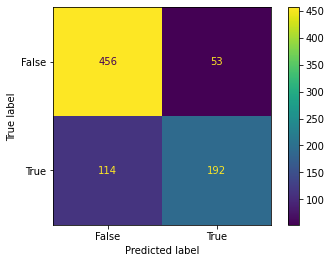

In [58]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [59]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder